6　 標準貿易モデル

　教科書で示される通り、21世紀の25年間の世界貿易の最大の変化は、新興国からの輸出急増です。これが世界貿易機関(WTO)での新興国の発言力を高め、G20が2010年代に定期開催されるに至った背景でもあります。

　本例では、新興国の貿易パターン変化が、いかなる要因によりもたらされてきたのかをH＝Oモデルを中心に実装し、それらの国々にとって望ましい貿易政策を考察します。

　まず、pandas、numpy、matplotlib、statmodels、の4つのライブラリーを読み込みます。輸出関数の推計は、本章でもstatmodelsによる最小二乗法を用います。

In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

　続いて、データセットをURLから読み込みます。読み込んだデータをpandasデータフレームに収納します。このときのデータフレーム名は任意で構いません。左列の日時をインデックス化しておきます。尚、URLには、次の国々の1991年から2022年の四半期データが収録されています。

韓国
https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_Korea.csv?raw=true

インドネシア
https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_Indonesia.csv?raw=true

マレーシア
https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_Malaysia.csv?raw=true

フィリピン
https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_Philippines.csv?raw=true

タイ
https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_Thailand.csv?raw=true

インド
https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_India.csv?raw=true


In [2]:
#[2]データ読込み
url = "https://github.com/nagamamo/data/blob/main/6_Standard_Trade_Model_India.csv?raw=true"#Git-hubからCSVデータの入手
asia = pd.read_csv(url).dropna().set_index("t")#データフレームの作成

　データ読込みが間違いなく行われているかを、.head()により確認します。ここでの確認により、後段のセルで新変数（新Column）作成時にどの変数とどの変数をを用いればよいかを視認することが可能となります。

In [ ]:
#[3]データの確認
asia.head()

　貿易モデルの被説明変数、説明変数を算出し、新たな変数として、データフレームに追加します。ここでは、USドル建て輸出額（輸入額）を対数変換し(lnEXus)、二国間の相対価格比（Pin_Pus)、累積固定資本相対比（Cin_Cus）を算出、相手先国実質所得を対数変換（lnYus）します。

In [4]:
#[4]変数の生成
asia['lnEXus']=np.log(asia['export_us'])
asia['Pin_Pus']=asia['P_in']/asia['P_us']
asia['Cin_Cus']=asia['C_in']/asia['C_us']
asia['lnYus']=np.log(asia['Y_us'])

　本例では、複数の新興国の異なる貿易パターンを比較するため、データを「標準化」した上で推計を行います。一般的なデータの「標準化」と「正規化」の違いは、


「標準化」…データを平均0、分散1に変換

「正規化」…データを0～1の値に変換


です。それぞれの国々の資源、すなわち相対価格と資本相対比は、異なりますので、これらを「標準化」することで、国際間の貿易パターンの違いを検証します。

　「標準化」後のデータの記述統計を確認すると、それぞれデータが平均0、分散1に変換されていることがわかります。

In [ ]:
asia2 = asia[['lnEXus','Pin_Pus','Cin_Cus','lnYus']]
asia3 = (asia2 - asia2.mean()) / asia2.std()
asia3.describe()

　「第6章 貿易標準モデル」においても、二国間の「相対価格比*Pc*/*Pf*」と「労働レンタル比率*l*/*w*」が正の関係にあることを説明しています。それゆえ、本例でも、二国間の相対価格比(*Pjp*/*Pus*)が輸出（輸入）にプラスの影響を与えていれば、労働集約型産業の生産性上昇（低下）が輸出（輸入）増進に貢献していることが支持されます。



　他方、二国間の累積固定資本比(*Cjp*/*Cuj*)は、両国でどの程度の生産能力増強が企業により行われてきたかを示す変数です。これが輸出（輸入）にプラスの影響をもたらしていれば、労働と資本のうち、資本の相対的な増加（減少）が輸出（輸入）を促していることになります。


　米国（*Yus*)と中国（*Ycn*)を説明変数として用いた場合の推計結果を比較してみると、韓国・ASEAN・インドの米国・中国との貿易パターンが、近年、大きく変化していることを、確認することができます。

　実証前に貿易データと、各変数の二カ国間の相対価格比、累積固定資本相対比、最終需要データを、それぞれ散布図を作成し、可視化します。

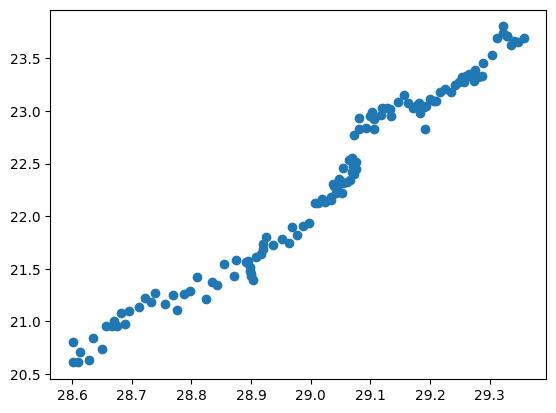

In [6]:
#[5]可視化
plt.scatter(asia.lnYus,asia.lnEXus)
#plt.scatter(asia.Pjp_Pus,asia.lnEXus)
#plt.scatter(asia.Cjp_Cus,asia.lnEXus)

　最後に実証モデルを最小二乗法により推計します。本例では、被説明変数は日本の米国への輸出額（lnEXus）、説明変数はそれぞれ日米価格相対比（Pjp_Pus）、日米累積固定資本相対比（Cjp_Cus)、米国の実質最終需要(lnYus)です。

　複数の新興国の推計結果を比較してみると、（1）輸入関税、（2）輸出補助金、(3)対内投資誘致、のいずれが貿易政策として所得増進に効果的であるのかがわかります。

In [7]:
#[6]H=Oモデルの推計
X=asia3[['Pin_Pus','Cin_Cus','lnYus']]
y=asia3['lnEXus']
X=sm.add_constant(X)
Model=sm.OLS(y,X).fit()
print(Model.summary().tables[1])
print('AdjR2: %.4f'% Model.rsquared_adj)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.43e-15      0.013  -4.08e-13      1.000      -0.026       0.026
Pin_Pus       -0.0288      0.085     -0.341      0.734      -0.196       0.139
Cin_Cus        0.2936      0.070      4.196      0.000       0.155       0.432
lnYus          0.7449      0.038     19.692      0.000       0.670       0.820
AdjR2: 0.9780
